In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings(action='ignore')

#데이터 전처리
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm 
from sklearn.model_selection import KFold

#시각화 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정
plt.rc('font', family= 'Malgun Gothic')



In [2]:
#데이터 불러오기
xs = pd.read_excel('주문 시간별(메뉴별)_신세계강남.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
ys = pd.read_excel('주문 시간별(메뉴별)_서울숲.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
zs = pd.read_excel('주문 시간별(메뉴별)_현대대구.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
a = pd.read_excel('주문 시간별(메뉴별)_현대디큐브.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
b = pd.read_excel('주문 시간별(메뉴별)_현대목동.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
c = pd.read_excel('주문 시간별(메뉴별)_현대무역센터.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
d = pd.read_excel('주문 시간별(메뉴별)_현대압구정.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
e = pd.read_excel('주문 시간별(메뉴별)_현대중동.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
f = pd.read_excel('주문 시간별(메뉴별)_현대천호.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
g = pd.read_excel('주문 시간별(메뉴별)_현대충청.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
h = pd.read_excel('주문 시간별(메뉴별)_현대킨텍스.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
i = pd.read_excel('주문 시간별(메뉴별)_AK타운.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
j = pd.read_excel('주문 시간별(메뉴별)_신세계경기.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
k = pd.read_excel('주문 시간별(메뉴별)_신세계센텀.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
l = pd.read_excel('주문 시간별(메뉴별)_신세계의정부.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])
m = pd.read_excel('주문 시간별(메뉴별)_신세계충청.xlsx',names=['a','b','가맹점','주문일자','주문시간','반품일시','상품분류','상품코드','상품명','상품단가','주문건수','폐기건수','주문금액','할인금액','실매출합계','부가세액','순매출','기타금액','총합계','결제수단'])


In [3]:
#데이터 전처리
xs.drop(['a','b'],axis=1, inplace=True)
ys.drop(['a','b'],axis=1, inplace=True)
zs.drop(['a','b'],axis=1, inplace=True)
a.drop(['a','b'],axis=1, inplace=True)
b.drop(['a','b'],axis=1, inplace=True)
c.drop(['a','b'],axis=1, inplace=True)
d.drop(['a','b'],axis=1, inplace=True)
e.drop(['a','b'],axis=1, inplace=True)
f.drop(['a','b'],axis=1, inplace=True)
g.drop(['a','b'],axis=1, inplace=True)
h.drop(['a','b'],axis=1, inplace=True)
i.drop(['a','b'],axis=1, inplace=True)
j.drop(['a','b'],axis=1, inplace=True)
k.drop(['a','b'],axis=1, inplace=True)
l.drop(['a','b'],axis=1, inplace=True)
m.drop(['a','b'],axis=1, inplace=True)

xs.drop([0,1,2,3],axis=0, inplace=True)
ys.drop([0,1,2,3],axis=0, inplace=True)
zs.drop([0,1,2,3],axis=0, inplace=True)
a.drop([0,1,2,3],axis=0, inplace=True)
b.drop([0,1,2,3],axis=0, inplace=True)
c.drop([0,1,2,3],axis=0, inplace=True)
d.drop([0,1,2,3],axis=0, inplace=True)
e.drop([0,1,2,3],axis=0, inplace=True)
f.drop([0,1,2,3],axis=0, inplace=True)
g.drop([0,1,2,3],axis=0, inplace=True)
h.drop([0,1,2,3],axis=0, inplace=True)
i.drop([0,1,2,3],axis=0, inplace=True)
j.drop([0,1,2,3],axis=0, inplace=True)
k.drop([0,1,2,3],axis=0, inplace=True)
l.drop([0,1,2,3],axis=0, inplace=True)
m.drop([0,1,2,3],axis=0, inplace=True)


xs = xs.iloc[:-3]
ys = ys.iloc[:-3]
zs = zs.iloc[:-3]
a = a.iloc[:-3]
b = b.iloc[:-3]
c = c.iloc[:-3]
d = d.iloc[:-3]
e = e.iloc[:-3]
f = f.iloc[:-3]
g = g.iloc[:-3]
h = h.iloc[:-3]
i = i.iloc[:-3]
j = j.iloc[:-3]
k = k.iloc[:-3]
l = l.iloc[:-3]
m = m.iloc[:-3]

xs = xs[(xs.주문시간 != '소계')]
xs[xs.주문시간 ==""] = np.NaN
xs[xs.가맹점 =="" ] = np.NAN 

ys = ys[(ys.주문시간 != '소계')]
ys[ys.주문시간 ==""] = np.NaN
ys[ys.가맹점 =="" ] = np.NAN 

zs = zs[(zs.주문시간 != '소계')]
zs[zs.주문시간 ==""] = np.NaN
zs[zs.가맹점 =="" ] = np.NAN 

a = a[(a.주문시간 != '소계')]
a[a.주문시간 ==""] = np.NaN
a[a.가맹점 =="" ] = np.NAN 

b = b[(b.주문시간 != '소계')]
b[b.주문시간 ==""] = np.NaN
b[b.가맹점 =="" ] = np.NAN 

c = c[(c.주문시간 != '소계')]
c[c.주문시간 ==""] = np.NaN
c[c.가맹점 =="" ] = np.NAN 

d = d[(d.주문시간 != '소계')]
d[d.주문시간 ==""] = np.NaN
d[d.가맹점 =="" ] = np.NAN 

e = e[(e.주문시간 != '소계')]
e[e.주문시간 ==""] = np.NaN
e[e.가맹점 =="" ] = np.NAN 

f = f[(f.주문시간 != '소계')]
f[f.주문시간 ==""] = np.NaN
f[f.가맹점 =="" ] = np.NAN 

g = g[(g.주문시간 != '소계')]
g[g.주문시간 ==""] = np.NaN
g[g.가맹점 =="" ] = np.NAN 

h = h[(h.주문시간 != '소계')]
h[h.주문시간 ==""] = np.NaN
h[h.가맹점 =="" ] = np.NAN 

i = i[(i.주문시간 != '소계')]
i[i.주문시간 ==""] = np.NaN
i[i.가맹점 =="" ] = np.NAN 

j = j[(j.주문시간 != '소계')]
j[j.주문시간 ==""] = np.NaN
j[j.가맹점 =="" ] = np.NAN 

k = k[(k.주문시간 != '소계')]
k[k.주문시간 ==""] = np.NaN
k[k.가맹점 =="" ] = np.NAN 

l = l[(l.주문시간 != '소계')]
l[l.주문시간 ==""] = np.NaN
l[l.가맹점 =="" ] = np.NAN 

m = m[(m.주문시간 != '소계')]
m[m.주문시간 ==""] = np.NaN
m[m.가맹점 =="" ] = np.NAN 



In [4]:
xs[['가맹점','주문일자','주문시간','상품명']]= xs[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
ys[['가맹점','주문일자','주문시간','상품명']]= ys[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
zs[['가맹점','주문일자','주문시간','상품명']]= zs[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
a[['가맹점','주문일자','주문시간','상품명']]= a[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
b[['가맹점','주문일자','주문시간','상품명']]= b[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
c[['가맹점','주문일자','주문시간','상품명']]= c[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
d[['가맹점','주문일자','주문시간','상품명']]= d[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
e[['가맹점','주문일자','주문시간','상품명']]= e[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
f[['가맹점','주문일자','주문시간','상품명']]= f[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
g[['가맹점','주문일자','주문시간','상품명']]= g[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
h[['가맹점','주문일자','주문시간','상품명']]= h[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
i[['가맹점','주문일자','주문시간','상품명']]= i[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
j[['가맹점','주문일자','주문시간','상품명']]= j[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
k[['가맹점','주문일자','주문시간','상품명']]= k[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
l[['가맹점','주문일자','주문시간','상품명']]= l[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')
m[['가맹점','주문일자','주문시간','상품명']]= m[['가맹점','주문일자','주문시간','상품명']].fillna(method='ffill')

In [5]:
xs=xs.append(ys,ignore_index=True)
xs=xs.append(zs,ignore_index=True)
xs=xs.append(a,ignore_index=True)
xs=xs.append(b,ignore_index=True)
xs=xs.append(c,ignore_index=True)
xs=xs.append(d,ignore_index=True)
xs=xs.append(e,ignore_index=True)
xs=xs.append(f,ignore_index=True)
xs=xs.append(g,ignore_index=True)
xs=xs.append(h,ignore_index=True)
xs=xs.append(i,ignore_index=True)
xs=xs.append(j,ignore_index=True)
xs=xs.append(k,ignore_index=True)
xs=xs.append(l,ignore_index=True)
xs=xs.append(m,ignore_index=True)

In [6]:
# 중복되는 항목 합계 및 통계적으로 의미가 크게 없는 항목 제외 
xs=xs = xs[(xs.상품명 != '숫자초')]
xs=xs = xs[(xs.상품명 != '크림치즈소스')]
xs=xs = xs[(xs.상품명 != '초코소스')]
xs=xs = xs[(xs.상품명 != '카라멜 소스')]
xs=xs = xs[(xs.상품명 != '종이 쇼핑백')]
xs=xs = xs[(xs.상품명 != '샷추가')]
xs=xs = xs[(xs.상품명 != 'ICE')]
xs=xs = xs[(xs.상품명 != '무료_리유저블텀블러')]
xs=xs = xs[(xs.상품명 != '(딜)ICE')]
xs=xs = xs[(xs.상품명 != '데우기')]
xs=xs = xs[(xs.상품명 != '커피(직원용)')]
xs=xs = xs[(xs.상품명 != 'HOT')]
xs=xs = xs[(xs.상품명 != 'TAKE IN')]
xs=xs = xs[(xs.상품명 != 'TO GO')]
xs=xs = xs[(xs.상품명 != '(딜)크림치즈소스')]

xs.replace("아메리카노(브루)","아메리카노",inplace=True)
xs.replace("ice아메리카노","아메리카노",inplace=True)
xs.replace("ice 아메리카노","아메리카노",inplace=True)
xs.replace("아이스 카페라떼(브루)","카페라떼",inplace=True)
xs.replace("ice 카페라떼","카페라떼",inplace=True)
xs.replace("아이스커피(브루)","아이스커피",inplace=True)
xs.replace("(딜)더블 초코 미니팩","(2)더블초코미니팩",inplace=True)
xs.replace("(딜)더블 피칸 미니팩","(3)더블피칸미니팩",inplace=True)
xs.replace("(딜)더블피칸 시나팩","(5)더블피칸시나팩",inplace=True)
xs.replace("(딜)딸기칠라타","딸기칠라타",inplace=True)
xs.replace("(딜)딸기피지","콤보_딸기피지",inplace=True)
xs.replace("(딜)망고칠라타","망고칠라타",inplace=True)
xs.replace("(딜)망고피지","콤보_망고피지",inplace=True)
xs.replace("(딜)바닐라라떼","바닐라라떼",inplace=True)
xs.replace("ice 바닐라라떼","바닐라라떼",inplace=True)
xs.replace("(딜)베리 버라이어티팩","베리 버라이어티 팩",inplace=True)
xs.replace("(딜)베리본","베리 본",inplace=True)
xs.replace("(딜)시그니처 카푸치노","시그니쳐카푸치노",inplace=True)
xs.replace("(딜)아메리카노","아메리카노",inplace=True)
xs.replace("(딜)얼그레이","얼그레이",inplace=True)
xs.replace("ice얼그레이","얼그레이",inplace=True)
xs.replace("(딜)잉글리쉬블랙퍼스트","잉글리쉬블랙퍼스트",inplace=True)
xs.replace("ice잉글리쉬블랙퍼스트","잉글리쉬블랙퍼스트",inplace=True)
xs.replace("(딜)초코 미니본","Mini 초코본",inplace=True)
xs.replace("(딜)카라멜 피칸 미니본","카라멜 피칸 Mini 본",inplace=True)
xs.replace("(딜)카라멜 피칸본","카라멜 피칸 본",inplace=True)
xs.replace("(딜)카모마일","카모마일",inplace=True)
xs.replace("ice카모마일","카모마일",inplace=True)
xs.replace("(딜)카페라떼","카페라떼",inplace=True)
xs.replace("(딜)클래식 미니본","클래식 Mini 본",inplace=True)
xs.replace("(딜)클래식 시나팩","(4)C4클래식시나팩",inplace=True)
xs.replace("(딜)트리플 시나팩","(6)TC9트리플시나팩",inplace=True)



In [7]:
Xs = xs[(xs.가맹점 == '시나본 신세계강남점')]
Ys = xs[(xs.가맹점 == '시나본 서울숲점')]
Zs = xs[(xs.가맹점 == '시나본 현대 디큐브점')]
A = xs[(xs.가맹점 == '시나본 현대 목동점')]
B = xs[(xs.가맹점 == '시나본 현대 본점')]
C = xs[(xs.가맹점 == '시나본 현대 충청점')]
D = xs[(xs.가맹점 == '시나본 현대대구점')]
E = xs[(xs.가맹점 == '시나본 현대무역센터점')]
F = xs[(xs.가맹점 == '시나본 현대중동점')]
G = xs[(xs.가맹점 == '시나본 현대천호점')]
H = xs[(xs.가맹점 == '시나본 현대킨텍스점')]
I = xs[(xs.가맹점 == '시나본 AK Town점')]
J= xs[(xs.가맹점 == '시나본 신세계경기점')]
K= xs[(xs.가맹점 == '시나본 신세계센텀점')]
L= xs[(xs.가맹점 == '시나본 신세계 의정부점')]
M= xs[(xs.가맹점 == '시나본 신세계 충청점')]

In [8]:
X_piv = pd.pivot_table(Xs, index=['주문일자'], values = '순매출', aggfunc = np.sum)
Y_piv = pd.pivot_table(Ys, index=['주문일자'], values = '순매출', aggfunc = np.sum)
Z_piv = pd.pivot_table(Zs, index=['주문일자'], values = '순매출', aggfunc = np.sum)
A_piv = pd.pivot_table(A, index=['주문일자'], values = '순매출', aggfunc = np.sum)
B_piv = pd.pivot_table(B, index=['주문일자'], values = '순매출', aggfunc = np.sum)
C_piv = pd.pivot_table(C, index=['주문일자'], values = '순매출', aggfunc = np.sum)
D_piv = pd.pivot_table(D, index=['주문일자'], values = '순매출', aggfunc = np.sum)
E_piv = pd.pivot_table(E, index=['주문일자'], values = '순매출', aggfunc = np.sum)
F_piv = pd.pivot_table(F, index=['주문일자'], values = '순매출', aggfunc = np.sum)
G_piv = pd.pivot_table(G, index=['주문일자'], values = '순매출', aggfunc = np.sum)
H_piv = pd.pivot_table(H, index=['주문일자'], values = '순매출', aggfunc = np.sum)
I_piv = pd.pivot_table(I, index=['주문일자'], values = '순매출', aggfunc = np.sum)
J_piv = pd.pivot_table(J, index=['주문일자'], values = '순매출', aggfunc = np.sum)
K_piv = pd.pivot_table(K, index=['주문일자'], values = '순매출', aggfunc = np.sum)
L_piv = pd.pivot_table(L, index=['주문일자'], values = '순매출', aggfunc = np.sum)
M_piv = pd.pivot_table(M, index=['주문일자'], values = '순매출', aggfunc = np.sum)

In [9]:
#지점별 영업일 카운트
print( len(X_piv),len(Y_piv), len(Z_piv), len(A_piv), len(B_piv), len(C_piv), len(D_piv), len(E_piv), len(F_piv), len(G_piv),  len(H_piv), len(I_piv), len(J_piv), len(K_piv), len(L_piv),len(M_piv))

print("81: c현대무역센터 ", 
      "82:c신세계강남, c현대디큐브, c현대목동, c현대본점, c현대충청","c현대대구","c현대중동","c현대천호", "c현대킨텍스, c신세계경기, 신세계센텀, 신세계의정부 ", "83: AK town", "84: c서울숲", "86:c신세계충청")






82 84 82 82 82 82 82 81 82 82 82 83 82 82 82 86
81: c현대무역센터  82:c신세계강남, c현대디큐브, c현대목동, c현대본점, c현대충청 c현대대구 c현대중동 c현대천호 c현대킨텍스, c신세계경기, 신세계센텀, 신세계의정부  83: AK town 84: c서울숲 86:c신세계충청


In [117]:
#생성된 pivot
with pd.ExcelWriter('서울연고지점.xlsx', engine='openpyxl', mode='a') as writer:
    J_piv.to_excel(writer,sheet_name='신세계경기')
    K_piv.to_excel(writer,sheet_name='신세계센텀')
    L_piv.to_excel(writer,sheet_name='신세계의정부')
    I_piv.to_excel(writer,sheet_name='AK town')
    #H_piv.to_excel(writer,sheet_name='현대킨텍스')
    #F_piv.to_excel(writer,sheet_name='현대중동')
    #C_piv.to_excel(writer,sheet_name='현대충청')
    #X_piv.to_excel(writer,sheet_name='신세계강남')
    #Z_piv.to_excel(writer,sheet_name='현대디큐브')
    #A_piv.to_excel(writer,sheet_name='현대목동')
    #B_piv.to_excel(writer,sheet_name='현대본점')
    #G_piv.to_excel(writer,sheet_name='현대천호')
    #Y_piv.to_excel(writer, sheet_name='서울숲')
    #M_piv.to_excel(writer, sheet_name='신세계충청')
writer.close()


ValueError: I/O operation on closed file

In [10]:

#데이터셋 로드 및 설명
data = pd.read_csv('경기날씨.csv')
data2 = pd.read_excel('서울연고지점.xlsx')


In [11]:
X =pd.DataFrame(data, columns=['day','avgtemp','hightemp','avgwind'])
y = pd.DataFrame(data2, columns=['순매출'])

In [12]:
y

,순매출
0,241365
1,283182
2,440907
3,862544
4,771908
...,...
143,0
144,0
145,0
146,0


In [13]:
'''
SEOUL= pd.DataFrame(data, columns=['day','hightemp','avgrain','avgwind'])
GN = pd.DataFrame(X_piv, columns=['netprofit'])
DQ = pd.DataFrame(Z_piv, columns=['netprofit'])
MD = pd.DataFrame(A_piv, columns=['netprofit'])
BJ = pd.DataFrame(B_piv, columns=['netprofit'])
CH = pd.DataFrame(G_piv, columns=['netprofit'])
'''

"\nSEOUL= pd.DataFrame(data, columns=['day','hightemp','avgrain','avgwind'])\nGN = pd.DataFrame(X_piv, columns=['netprofit'])\nDQ = pd.DataFrame(Z_piv, columns=['netprofit'])\nMD = pd.DataFrame(A_piv, columns=['netprofit'])\nBJ = pd.DataFrame(B_piv, columns=['netprofit'])\nCH = pd.DataFrame(G_piv, columns=['netprofit'])\n"

In [14]:
#Train/Test 데이터 분리
# Training 데이터 70%/ Testing 데이터 30% 나누기 

#Train set/ Test set 나누기 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.439, random_state=2021)

#데이터 컬럼 단위 정규화 하기 
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (83, 4)
Test set dimension is (65, 4)


In [176]:
#모델링 (하이퍼파라미터 결정)

#4.1 단순 모델링(사용자가 하이퍼 파라미터 정의)

rfc = RandomForestClassifier(n_estimators=10,random_state=2021)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2021)

In [177]:
#Train set에 대한 성능 
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

#Test set에 대한 성능 
y_pred = rfc.predict(X_test) 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.4000


100%|██████████| 50/50 [00:10<00:00,  4.92it/s]


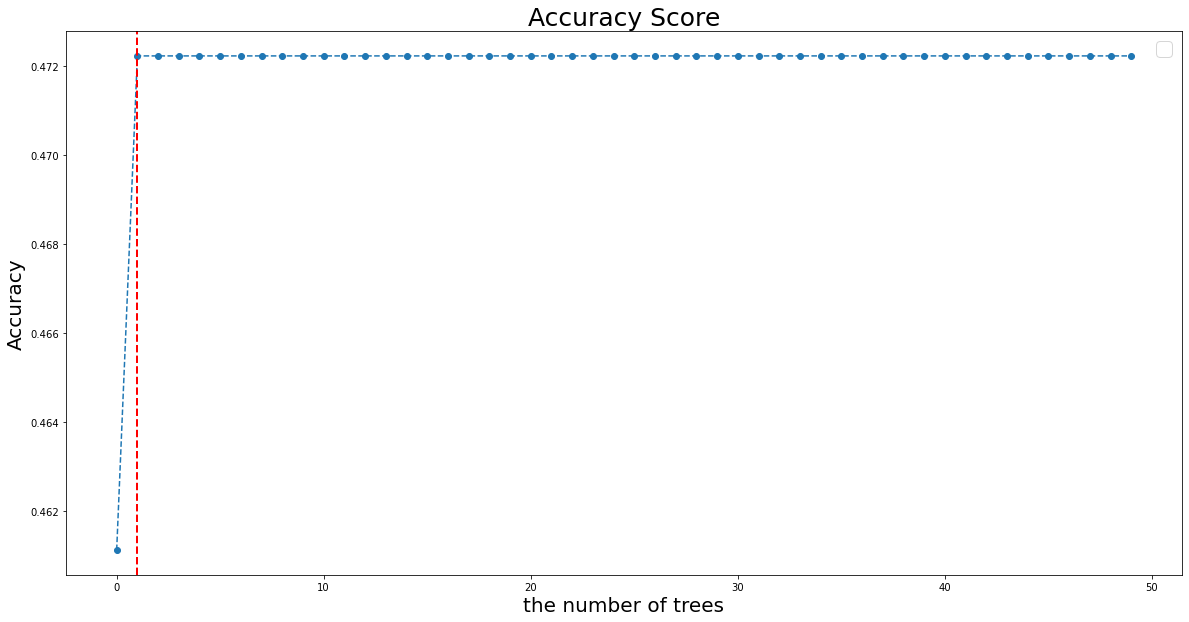

In [178]:
#단일 하이퍼 파라미터에 대한 Grid search 

cv_scores = []
estimator_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
  rfc = RandomForestClassifier(n_estimators=i+1,
                               n_jobs=-1,
                               random_state=2021
                              )
  score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
  cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)] 
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()


In [179]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")
print("Train set에 대한 성능 (10 fold cross validation)")
print(f"정확도:{max(cv_scores):0.4f}")

최적의 tree개수:2


Train set에 대한 성능 (10 fold cross validation)
정확도:0.4722


In [180]:
rfc = RandomForestClassifier(n_estimators=37, n_jobs=-1, random_state=2021)
rfc.fit(X_train, y_train)

#Train set에 대한 성능 
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

#Test set에 대한 성능 
y_pred = rfc.predict(X_test) 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")


Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.4000


In [181]:
print("MSE :", mean_squared_error(y_test, y_pred))

MSE : 53360005044.06154


In [182]:
import pandas as pd 
import csv

rf_data=pd.DataFrame(y_pred)

rf_data


rf_data.to_csv('rfaktown.csv', index=False)


In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.295, random_state=1000)

# Random Forest Regressor 
rfr = RandomForestRegressor(random_state=1000)
param_grid = {
    'max_depth': [10, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['mae', 'mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2')
CV_rfr.fit(X_train, y_train)

best_rfr = CV_rfr.best_estimator_ 
best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)

r2score = r2_score(y_true = y_test, y_pred = y_pred) ##R-squared score 
mse = mean_squared_error(y_true = y_test, y_pred =y_pred) ## MSE (Mean Squared Error)
mae = mean_absolute_error(y_true = y_test, y_pred =y_pred) ## MAE (Mean Absolute Error)

print('Random Forest Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE{mse:0.4f}", f"MAE{mae:0.4f}", sep = '  |. ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Random Forest Regressor
R2 score:0.8674  |. MSE37334352447.1635  |. MAE105055.7832


In [22]:
y

,순매출
0,771091
1,1099276
2,1115094
3,1654103
4,1365913
...,...
142,0
143,0
144,0
145,0
